<a href="https://colab.research.google.com/github/UrviGarg/Clustering/blob/main/clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully.
Dataset shape: (150, 4)
     0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2

--- Pre-processing: No Data Processing ---

  --- Algorithm: K-Means ---
    n_clusters: 3, Silhouette: 0.553, Calinski-Harabasz: 560.400, Davies-Bouldin: 0.662
    n_clusters: 4, Silhouette: 0.498, Calinski-Harabasz: 529.398, Davies-Bouldin: 0.781
    n_clusters: 5, Silhouette: 0.489, Calinski-Harabasz: 494.094, Davies-Bouldin: 0.806

  --- Algorithm: Hierarchical ---
    n_clusters: 3, Silhouette: 0.554, Calinski-Harabasz: 556.841, Davies-Bouldin: 0.657
    n_clusters: 4, Silhouette: 0.489, Calinski-Harabasz: 513.772, Davies-Bouldin: 0.796
    n_clusters: 5, Silhouette: 0.484, Calinski-Harabasz: 487.070, Davies-Bouldin: 0.821

  --- Algorithm: Mean Shift ---
    Estimated number of clusters: 2

--- Pre-processing: Normalization ---

  --- Algorithm: K-Means ---
    n_clusters: 3, Silhouette: 0.459, Ca

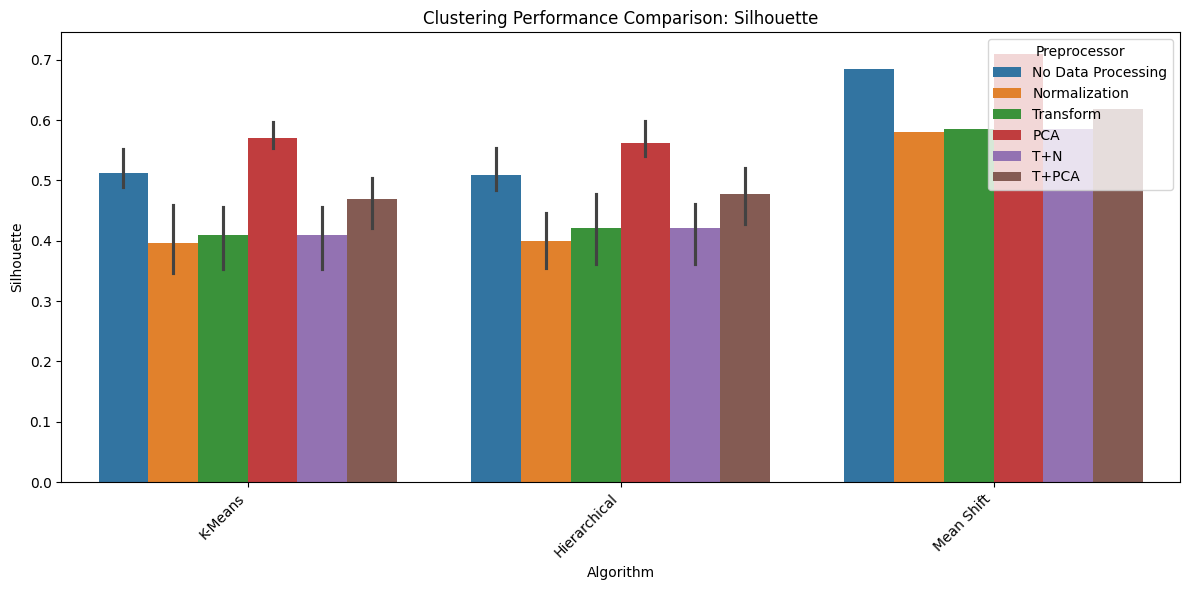

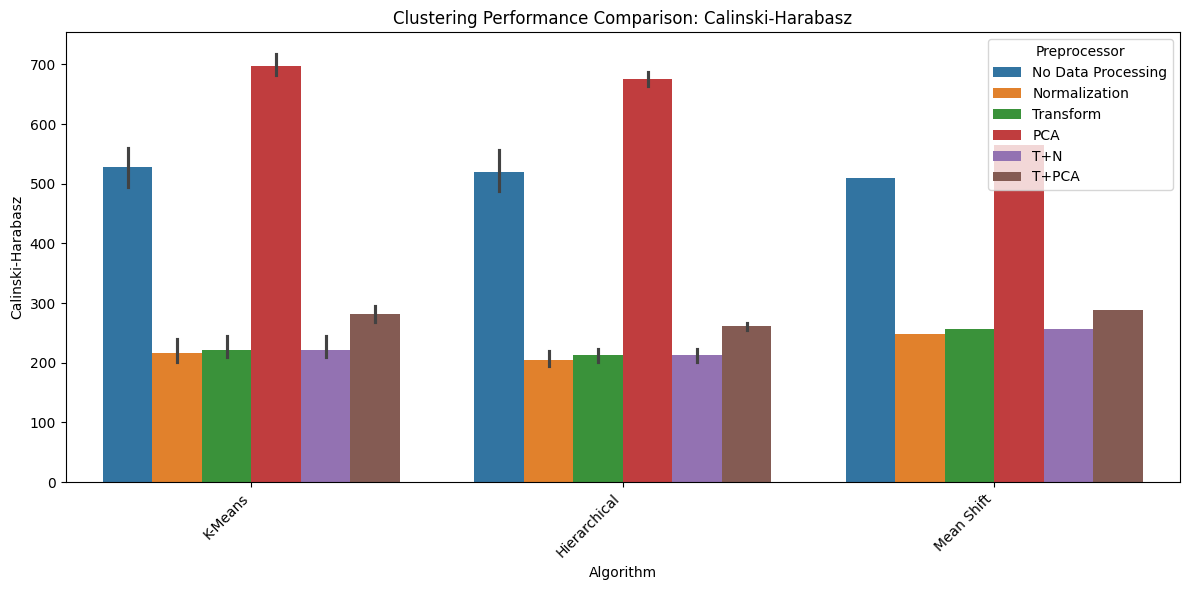

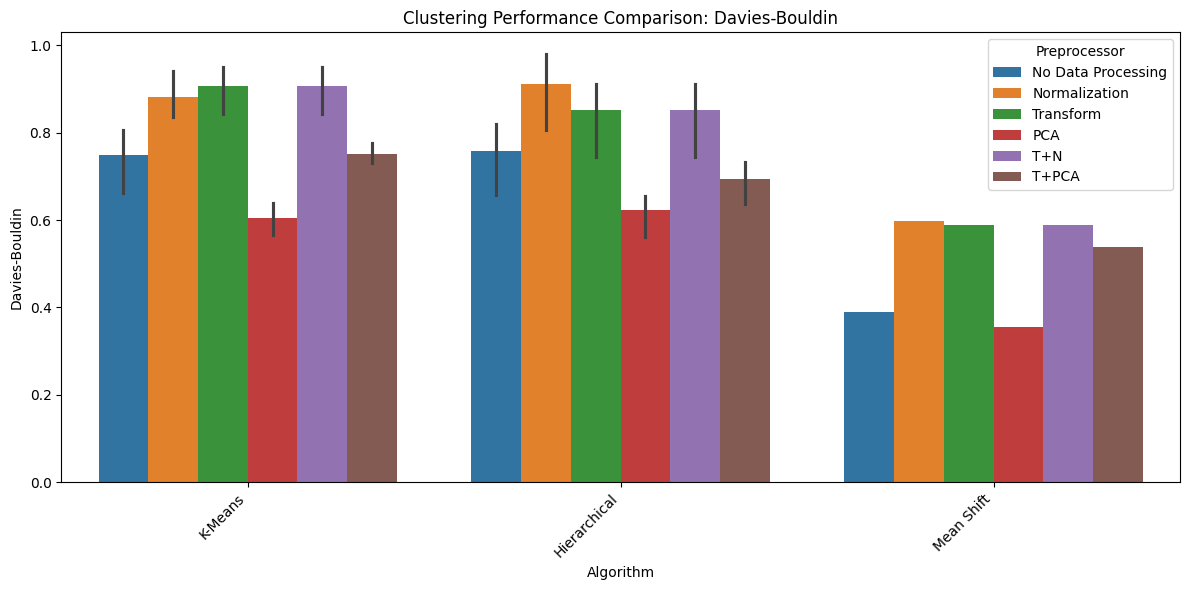

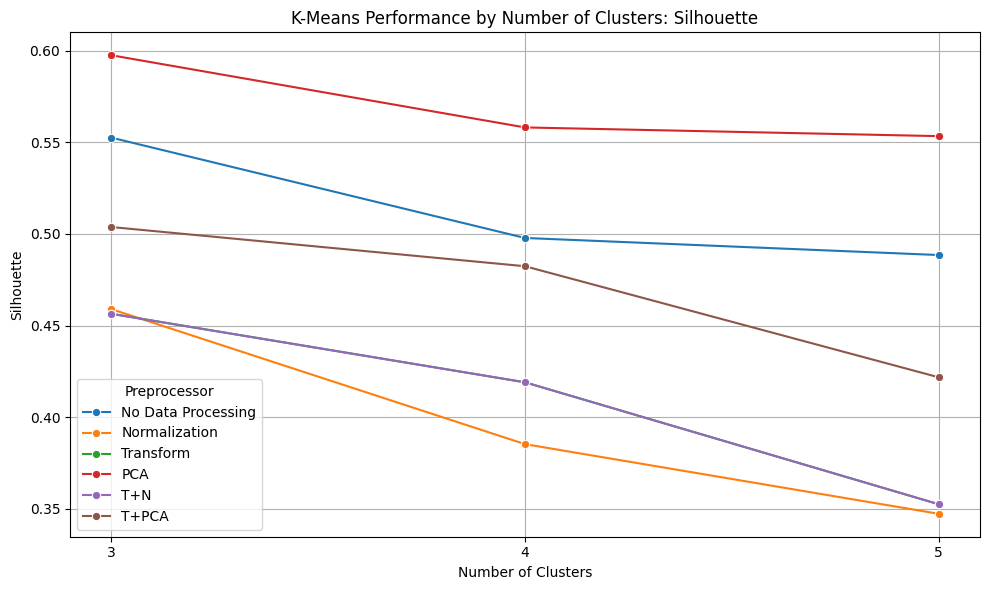

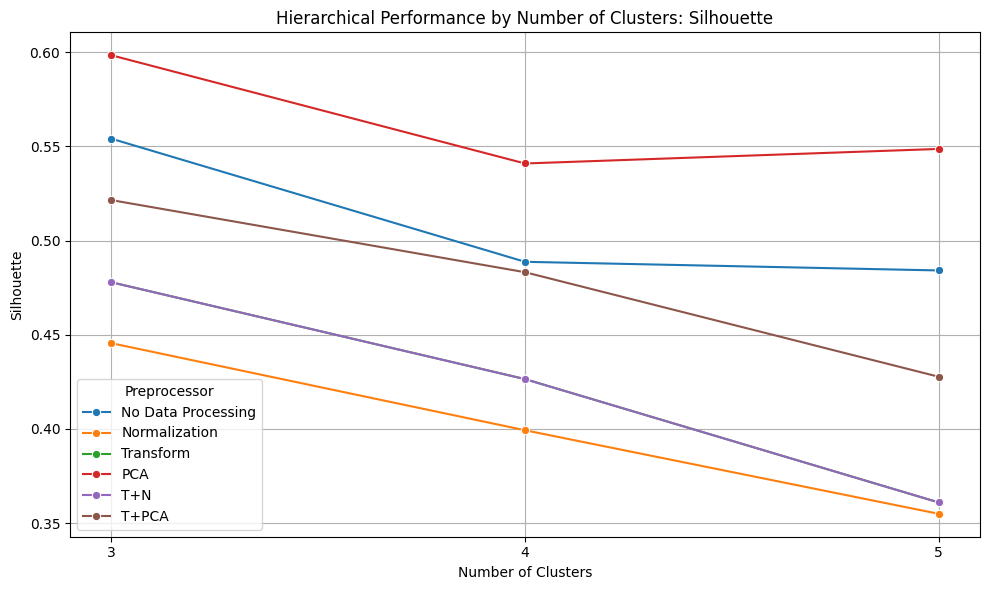

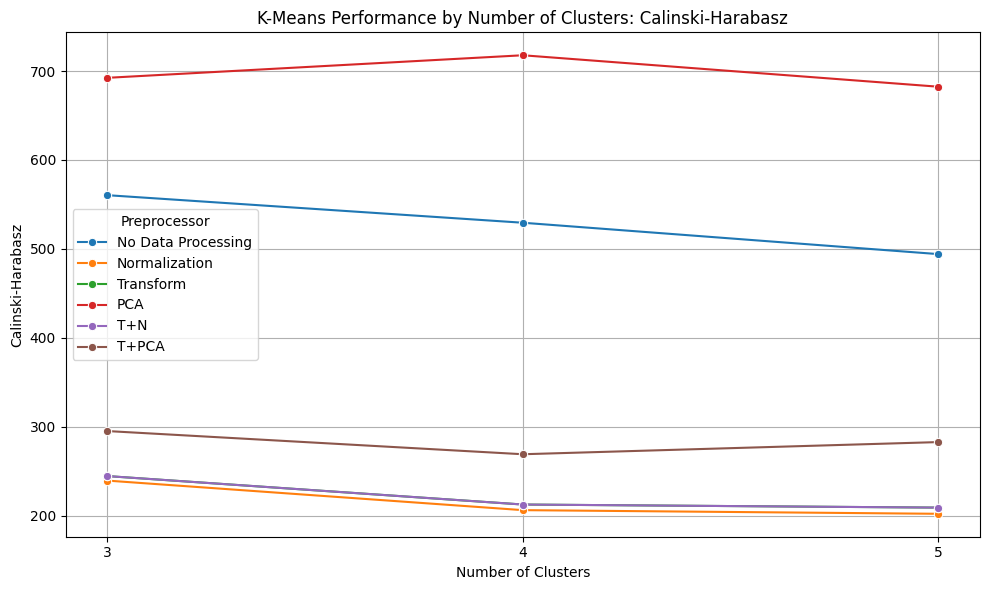

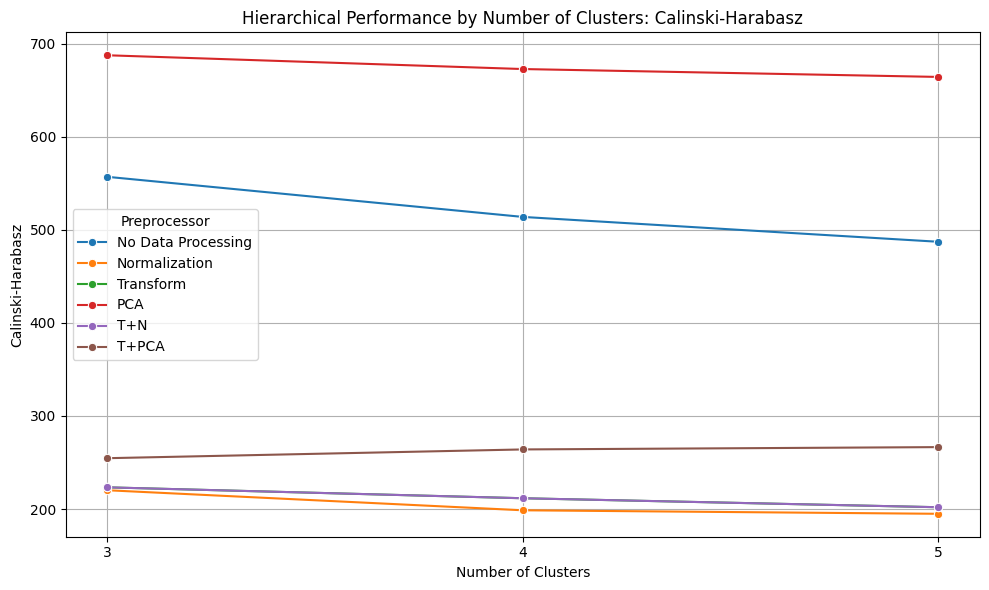

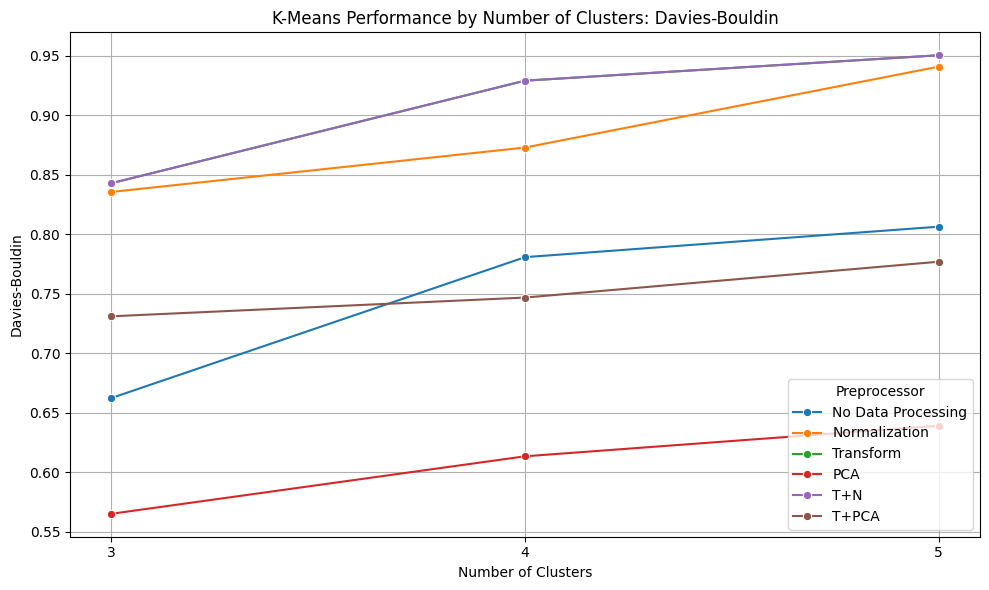

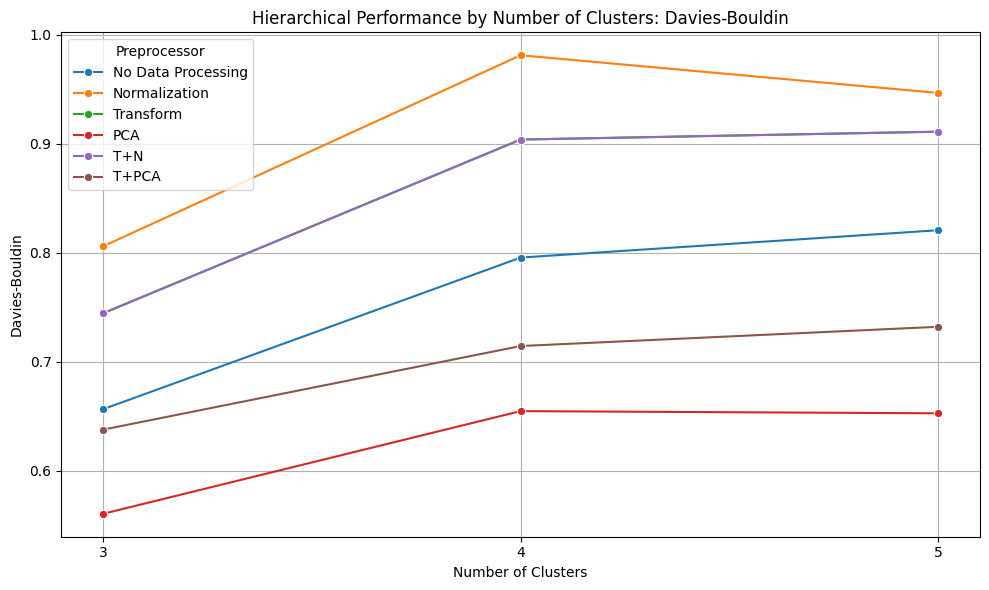

In [4]:

"""
Comparative Performance Study of Clustering Algorithms

"""

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load and Explore the Dataset ---
# Replace 'your_dataset.csv' with the actual name of your UCI dataset file
try:
    data = pd.read_csv("iris.data", header=None)  # Using Iris dataset as an example
    X = data.iloc[:, :-1]  # Features
    y = data.iloc[:, -1]   # Target (for potential qualitative analysis later)
    print("Dataset loaded successfully.")
    print("Dataset shape:", X.shape)
    print(X.head())
except FileNotFoundError:
    print("Error: Dataset file not found. Please upload your dataset and ensure the filename is correct.")
    exit()

# --- 2. Define Pre-processing Techniques ---
preprocessors = {
    "No Data Processing": None,
    "Normalization": StandardScaler(),
    "Transform": PowerTransformer(),
    "PCA": PCA(n_components=0.95),  # Keep 95% of variance
    "T+N": [PowerTransformer(), StandardScaler()],
    "T+PCA": [PowerTransformer(), PCA(n_components=0.95)]
}

# --- 3. Define Clustering Algorithms ---
clustering_algorithms = {
    "K-Means": KMeans,
    "Hierarchical": AgglomerativeClustering,
    "Mean Shift": MeanShift
}

n_clusters_options = [3, 4, 5]

# --- 4. Perform Clustering and Evaluation ---
results = []

for preprocessor_name, preprocessor in preprocessors.items():
    print(f"\n--- Pre-processing: {preprocessor_name} ---")
    X_processed = X.copy()
    if preprocessor:
        if isinstance(preprocessor, list):
            for p in preprocessor:
                X_processed = p.fit_transform(X_processed)
        else:
            X_processed = preprocessor.fit_transform(X_processed)

    for algorithm_name, algorithm in clustering_algorithms.items():
        print(f"\n  --- Algorithm: {algorithm_name} ---")
        if algorithm_name == "Mean Shift":
            try:
                bandwidth = estimate_bandwidth(X_processed)
                ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
                ms.fit(X_processed)
                labels = ms.labels_
                n_clusters_ = len(np.unique(labels))
                print(f"    Estimated number of clusters: {n_clusters_}")
                if n_clusters_ > 1:
                    silhouette = silhouette_score(X_processed, labels)
                    calinski = calinski_harabasz_score(X_processed, labels)
                    davies = davies_bouldin_score(X_processed, labels)
                    results.append({
                        "Preprocessor": preprocessor_name,
                        "Algorithm": algorithm_name,
                        "n_clusters": n_clusters_,
                        "Silhouette": silhouette,
                        "Calinski-Harabasz": calinski,
                        "Davies-Bouldin": davies
                    })
                else:
                    print("    Mean Shift found only one cluster, skipping evaluation.")
                    results.append({
                        "Preprocessor": preprocessor_name,
                        "Algorithm": algorithm_name,
                        "n_clusters": n_clusters_,
                        "Silhouette": np.nan,
                        "Calinski-Harabasz": np.nan,
                        "Davies-Bouldin": np.nan
                    })
            except Exception as e:
                print(f"    Error running Mean Shift: {e}")
                results.append({
                    "Preprocessor": preprocessor_name,
                    "Algorithm": algorithm_name,
                    "n_clusters": np.nan,
                    "Silhouette": np.nan,
                    "Calinski-Harabasz": np.nan,
                    "Davies-Bouldin": np.nan
                })

        else:  # K-Means and Hierarchical
            for n_clusters in n_clusters_options:
                try:
                    if algorithm_name == "K-Means":
                        model = algorithm(n_clusters=n_clusters, random_state=42, n_init=10)
                    else:  # Hierarchical
                        model = algorithm(n_clusters=n_clusters)
                    labels = model.fit_predict(X_processed)
                    silhouette = silhouette_score(X_processed, labels)
                    calinski = calinski_harabasz_score(X_processed, labels)
                    davies = davies_bouldin_score(X_processed, labels)
                    results.append({
                        "Preprocessor": preprocessor_name,
                        "Algorithm": algorithm_name,
                        "n_clusters": n_clusters,
                        "Silhouette": silhouette,
                        "Calinski-Harabasz": calinski,
                        "Davies-Bouldin": davies
                    })
                    print(f"    n_clusters: {n_clusters}, Silhouette: {silhouette:.3f}, Calinski-Harabasz: {calinski:.3f}, Davies-Bouldin: {davies:.3f}")
                except Exception as e:
                    print(f"    Error running {algorithm_name} with {n_clusters} clusters: {e}")
                    results.append({
                        "Preprocessor": preprocessor_name,
                        "Algorithm": algorithm_name,
                        "n_clusters": n_clusters,
                        "Silhouette": np.nan,
                        "Calinski-Harabasz": np.nan,
                        "Davies-Bouldin": np.nan
                    })

# --- 5. Create Pandas DataFrame for Results ---
results_df = pd.DataFrame(results)
print("\n--- Results Summary ---")
print(results_df)

# --- 6. Visualize Results (Optional) ---
def plot_results(df, metric):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df, x="Algorithm", y=metric, hue="Preprocessor")
    plt.title(f"Clustering Performance Comparison: {metric}")
    plt.ylabel(metric)
    plt.xlabel("Algorithm")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

for metric in ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]:
    plot_results(results_df, metric)

def plot_results_n_clusters(df, metric, algorithm_name):
    algorithm_df = df[df["Algorithm"] == algorithm_name]
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=algorithm_df, x="n_clusters", y=metric, hue="Preprocessor", marker='o')
    plt.title(f"{algorithm_name} Performance by Number of Clusters: {metric}")
    plt.ylabel(metric)
    plt.xlabel("Number of Clusters")
    plt.xticks(n_clusters_options)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

for metric in ["Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]:
    for algo in ["K-Means", "Hierarchical"]:
        plot_results_n_clusters(results_df, metric, algo)

# --- 7. Save Results to CSV (Optional) ---
# results_df.to_csv("clustering_performance_results.csv", index=False)
# print("\nResults saved to clustering_performance_results.csv")
